In [ ]:
import os
os.listdir("..")


In [1]:
import sys, os
sys.path.append("..")

from model.sim_model import load_scenario, simulate_load_profile


In [2]:
from model.sim_model import load_scenario, simulate_load_profile

scenario = load_scenario("../scenarios/office.yaml")
timestamps, load_kw = simulate_load_profile(scenario)


In [3]:
from model.sim_model import load_scenario, simulate_load_profile

scenario = load_scenario("../scenarios/office.yaml")
scenario["vehicles"]  # Kontrolle


{'soc_target': 1.0,
 'battery_capacity_kwh': 60,
 'max_pwr_vehicle_kw': 50,
 'expected_sessions_per_charger_per_day': 4.0}

In [4]:
timestamps, load_kw = simulate_load_profile(scenario)
len(timestamps), load_kw[:10]


(672, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [5]:
from model.sim_model import load_scenario, simulate_load_profile

scenario = load_scenario("../scenarios/office.yaml")
timestamps, load_kw = simulate_load_profile(scenario)


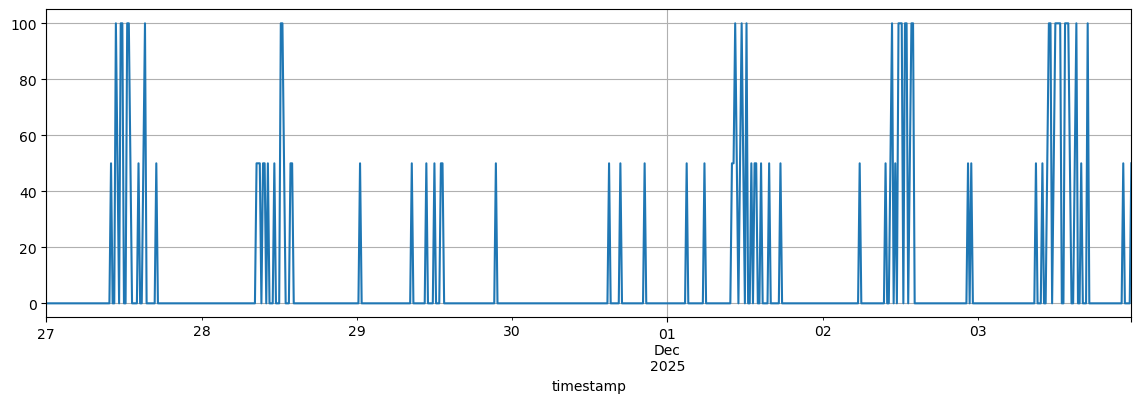

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"timestamp": timestamps, "load_kw": load_kw})
df = df.set_index("timestamp")

df["load_kw"].plot(figsize=(14,4))
plt.grid(True)
plt.show()
